# Object Detection - Graphical Degrading and Object Detection

### Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
### Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start

* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [14]:
import cv2 as cv
# !pip install opencv-python-headless
import numpy as np
import matplotlib.pyplot as plt 
# !pip install wandb
from wandb import Classes


def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    # Must save prior to show - for show clears the image!
    #plt.savefig("DetectionOutput.jpg")
    plt.show()

## Load Yolo Model

In [26]:
# load yolo
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

## Identify the number of layers in the model and their names

In [24]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [28]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [40]:
img = cv.imread("bermuda.jpg")
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


## Resize the image and output its dimensions

In [42]:
img = cv.resize(img, (416, 416))  # Add code to resize
height, width, channel = img.shape
print("Resized Shape: ", img.shape)

Resized Shape:  (416, 416, 3)


## Rotate the image using cv

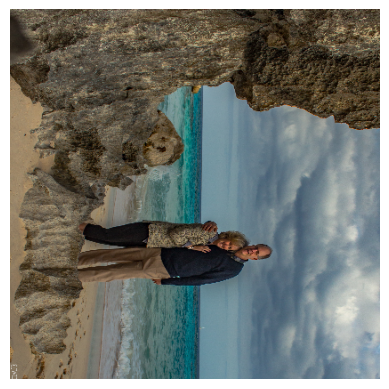

In [44]:
# Rotate
rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)  # add code to rotate
plot_cv_img(rotated_img)

## Rotate the image using scipy (might have to install if necessary)

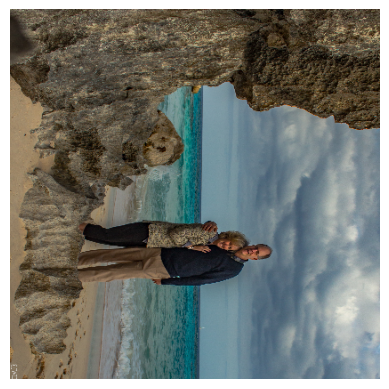

In [46]:
# Rotate
from scipy import ndimage
rotated_img = ndimage.rotate(img, angle=-90) # add code to rotate
# -90=> clockwise and 90=>anticlockwise
plot_cv_img(rotated_img)

## Add Salt and Pepper Noise

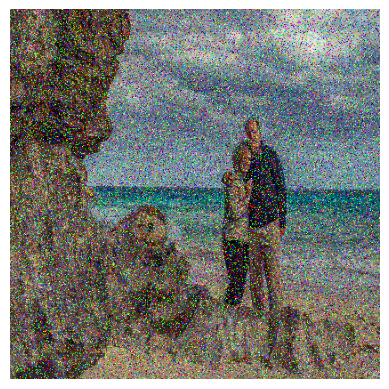

In [48]:
#add salt and pepper noise
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.

noise_img = random_noise(img, mode='s&p', amount=0.2)  # add code to add salt and pepper noise
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]

noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img)



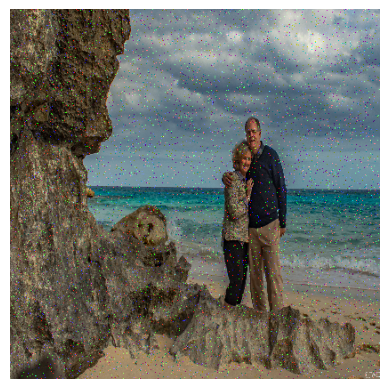

In [49]:
noise_img = random_noise(img, mode='s&p', amount=0.02)  # add code to add salt and pepper noise
noise_img = np.array(255*noise_img, dtype = 'uint8')
plot_cv_img(noise_img)


## Add Gaussian noise

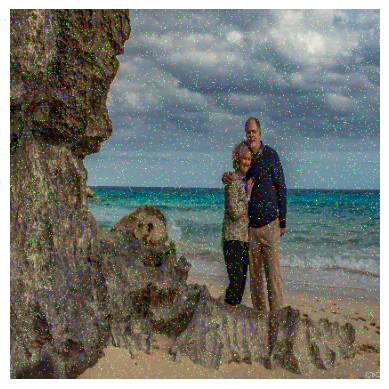

In [51]:
import numpy as np

gauss = np.random.normal(0, 0.5, img.size) # add code  to add gaussian noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img, gauss)  # Add the noise to the image
# Display the image
plot_cv_img(img_gauss)

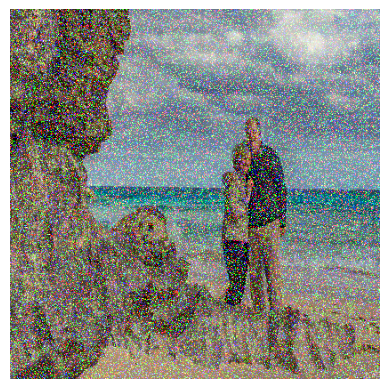

In [52]:
gauss = np.random.normal(0, 1.0, img.size) # add code  to add gaussian noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img, gauss)  # Add the noise to the image
# Display the image
plot_cv_img(img_gauss)

## Add Speckle Noise with color

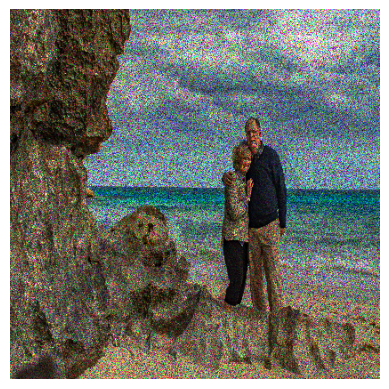

In [54]:
#Speckle Noise
import numpy as np
 
speckled_img = random_noise(img, mode='speckle', var=0.2)  
speckled_img = np.array(255*speckled_img, dtype = 'uint8')

plot_cv_img(speckled_img)

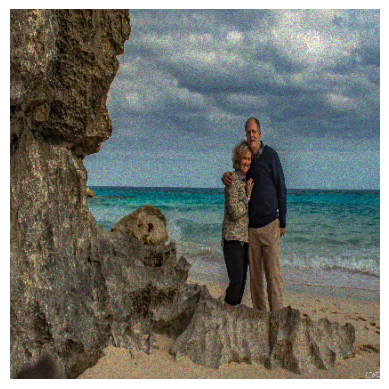

In [55]:
speckled_img = random_noise(img, mode='speckle', var=0.02)  
speckled_img = np.array(255*speckled_img, dtype = 'uint8')

plot_cv_img(speckled_img)

## Set up layers and colors

In [34]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [36]:
#note - 0.00392 = 1/250   416 is a standard square for yolo

# Define parameters
scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
size = (416, 416)       # Standard size for YOLO input
mean = (0, 0, 0)        # Mean subtraction (zero mean)
swapRB = True           # Swap Red and Blue channels

# Create blob from image
blob = cv.dnn.blobFromImage(img, scale_factor, size, mean, swapRB)

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

## Set up image on screen (all done for you)
### Note how to extract the identified objects and their assocated confidence. You need that for part 2 of this assignment


Resized Shape:  (416, 416, 3)
Type:  <class 'list'>
[6 4]
Object: person with confidence of 1.00
person 0.998009443283081
Object: person with confidence of 1.00
person 0.9980754256248474


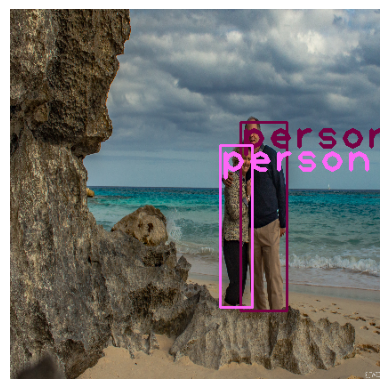

In [38]:
img = cv.imread("bermuda.jpg")
#print("Original Shape: ", img.shape)

img = cv.resize(img, (416, 416))  # Add code to resize
height, width, channel = img.shape
print("Resized Shape: ", img.shape)

# Define parameters
scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
size = (416, 416)       # Standard size for YOLO input
mean = (0, 0, 0)        # Mean subtraction (zero mean)
swapRB = True           # Swap Red and Blue channels

# Create blob from image
blob = cv.dnn.blobFromImage(img, scale_factor, size, mean, swapRB) # change

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5: # threshold
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 
print(indexes)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)
        print(label, confidences[i])

plot_cv_img(img)
#print(confidences)

# SUMMARY
    * Note the point at which the resize of the image degrades the image where the model can no longer detect the objects. Graph the degradation confidence.

    * Note the point at which the Gaussian noise and the salt and peper noise degrades the image where the model can no longer detect the objects. Graph the degradtion condifidence.

    * Note techniques in the model and/or image that improve the object detection.

    * PUT YOUR ANSWERS below which includes additional markdown cells, graph outputs and working code cells

# PLOT RESIZING


In [91]:
def resize_confidence(new_size):
    img = cv.imread("bermuda.jpg")

    # resizing to given size
    img = cv.resize(img, new_size)  # Add code to resize
    height, width, channel = img.shape
    
    # define padding dimensions
    desired_height, desired_width = 416, 416
    
    # Calculate the padding required
    top_pad = (desired_height - height) // 2
    bottom_pad = desired_height - height - top_pad
    left_pad = (desired_width - width) // 2
    right_pad = desired_width - width - left_pad
    
    # add padding
    padded_img = cv.copyMakeBorder(img, top_pad, bottom_pad, left_pad, right_pad, cv.BORDER_CONSTANT, value=(0, 0, 0))


    # Define parameters
    scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
    size = (416, 416)       # Standard size for YOLO input # changes here add padding
    mean = (0, 0, 0)        # Mean subtraction (zero mean)
    swapRB = True           # Swap Red and Blue channels

    # Create blob from image
    blob = cv.dnn.blobFromImage(padded_img, scale_factor, size, mean, swapRB) # change

    #detect objects
    net.setInput(blob)
    outs = net.forward(output_layer)

    # Showing Information on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
                # Reactangle Cordinate
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id) 
    
    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 
    
    confidence_objects = [confidences[i] for i in indexes]

    #return len(indexes), confidence_objects[0]
    return len(indexes), confidence_objects
    


    

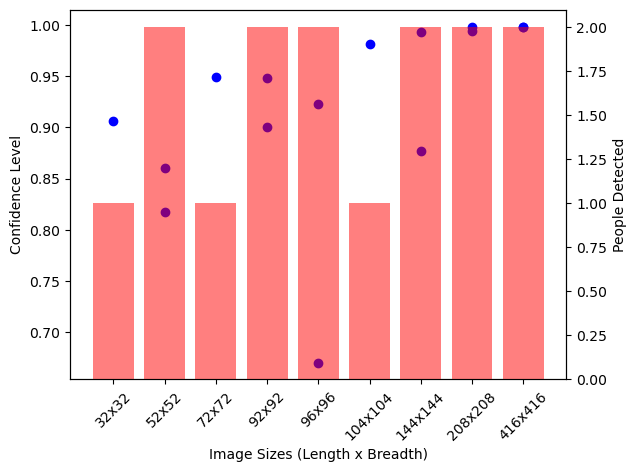

In [93]:
sizes = [(32, 32), (52, 52), (72, 72),(92, 92), (96, 96),(104, 104), (144, 144), (208, 208), (416, 416)]

detections = []
people_detected =[]

for size in sizes:
    
    detection = resize_confidence(size)[1]
    detections.append(detection)
    
    person = resize_confidence(size)[0]
    people_detected.append(person)
    
    
# Extract length and breadth from image sizes
length_breadth = [f"{size[0]}x{size[1]}" for size in image_sizes]

# Plotting
fig, ax1 = plt.subplots()

# Plot detections
ax1.set_xlabel('Image Sizes (Length x Breadth)')
ax1.set_ylabel('Confidence Level')
for i, detection in enumerate(detections):
    for confidence in detection:
        ax1.scatter(length_breadth[i], confidence, color='b', label='Detections')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y')

# Plot number of people detected
ax2 = ax1.twinx()
ax2.set_ylabel('People Detected')
ax2.bar(length_breadth, people_detected, color='r', alpha=0.5, label='People Detected')
ax2.tick_params(axis='y')

# Add legend
#fig.tight_layout()
#fig.legend(loc='upper left')

plt.show()

    

Detection confidence starts falling at size 144x144 and only one person is detected. So, this can be called as degradation point.

# PLOT GAUSSIAN NOISE

In [79]:
def gaussian_noise_confidence(amount): # gaussian 
    img = cv.imread("bermuda.jpg")    
    img = cv.resize(img, (416, 416))
    height, width, channel = img.shape
    
    
    # gaussian noise
    gaussy_img = random_noise(img, mode='gaussian', var=amount)
    gaussy_img = np.array(255 * gaussy_img, dtype='uint8')
    

    # Define parameters
    scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
    size = (416, 416)       # Standard size for YOLO input
    mean = (0, 0, 0)        # Mean subtraction (zero mean)
    swapRB = True           # Swap Red and Blue channels

    # Create blob from image
    blob = cv.dnn.blobFromImage(gaussy_img, scale_factor, size, mean, swapRB) # change

    #detect objects
    net.setInput(blob)
    outs = net.forward(output_layer)

    # Showing Information on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
                # Reactangle Cordinate
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id) 
    
    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 
    
    confidence_objects = [confidences[i] for i in indexes]
    
    return len(indexes), confidence_objects

    

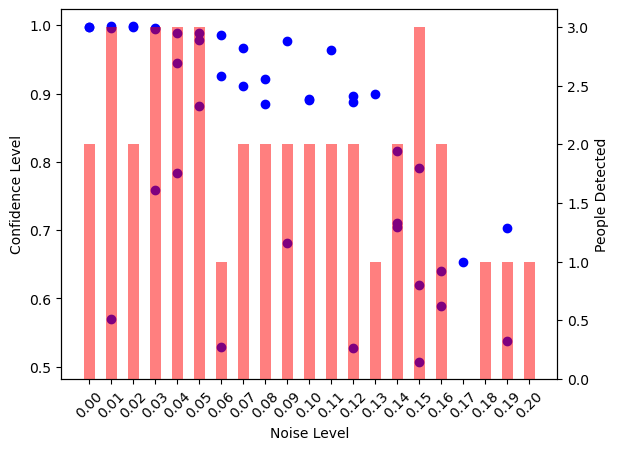

In [81]:
noises = [i/100 for i in range(21)]  # Generate noises from 0 to 0.2 at intervals of 0.01
detections = []
people_detected =[]

for noise in noises:
    
    detection = gaussian_noise_confidence(noise)[1]
    detections.append(detection)
    
    person = gaussian_noise_confidence(noise)[0]
    people_detected.append(person)
    
    
# Plotting
fig, ax1 = plt.subplots()

# Plot detections
ax1.set_xlabel('Noise Level')
ax1.set_ylabel('Confidence Level')
for i, detection in enumerate(detections):
    for confidence in detection:
        ax1.scatter(noises[i], confidence, color='b', label='Detections')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Plot number of people detected
ax2 = ax1.twinx()
ax2.set_ylabel('People Detected')
ax2.bar(noises, people_detected, width=0.005, color='r', alpha=0.5, label='People Detected') 
ax1.set_xticks(noises)
ax1.set_xticklabels([f"{noise:.2f}" for noise in noises], rotation=45)

plt.show()

At noise level 0.03, more than 2 people are detected. At 0.05, confidence level start to drop with multiple people detected.
So, 0.03 can be called as degradation point.

# PLOT SPECKLE NOISE

In [87]:
def speckle_noise_confidence(amount): 
    img = cv.imread("bermuda.jpg")    
    img = cv.resize(img, (416, 416))
    height, width, channel = img.shape
    
    
    # gaussian noise
    speckled_img = random_noise(img, mode='speckle', var=amount)
    speckled_img = np.array(255 * speckled_img, dtype='uint8')
    

    # Define parameters
    scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
    size = (416, 416)       # Standard size for YOLO input
    mean = (0, 0, 0)        # Mean subtraction (zero mean)
    swapRB = True           # Swap Red and Blue channels

    # Create blob from image
    blob = cv.dnn.blobFromImage(speckled_img, scale_factor, size, mean, swapRB) # change

    #detect objects
    net.setInput(blob)
    outs = net.forward(output_layer)

    # Showing Information on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
                # Reactangle Cordinate
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id) 
    
    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 
    
    confidence_objects = [confidences[i] for i in indexes]
    
    return len(indexes), confidence_objects

    

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_8090/3662156040.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([f"{noise:.1f}" for noise in noises], rotation=45)


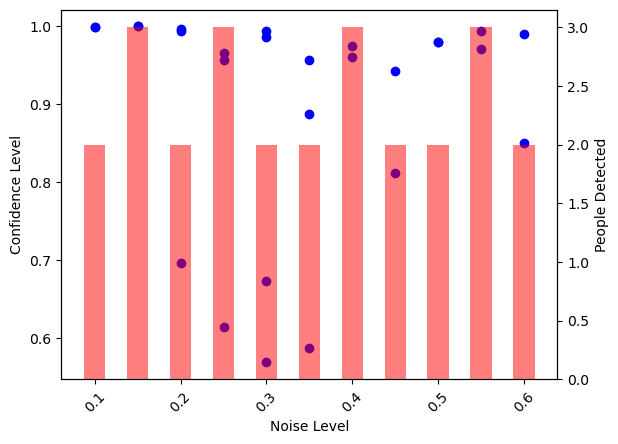

In [89]:
noises = [i/10 for i in range(11)]  
detections = []
people_detected =[]

for noise in noises:
    
    detection = speckle_noise_confidence(noise)[1]
    detections.append(detection)
    
    person = speckle_noise_confidence(noise)[0]
    people_detected.append(person)
    
    
# Plotting
fig, ax1 = plt.subplots()

# Plot detections
ax1.set_xlabel('Noise Level')
ax1.set_ylabel('Confidence Level')
for i, detection in enumerate(detections):
    for confidence in detection:
        ax1.scatter(noises[i], confidence, color='b', label='Detections')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Plot number of people detected
ax2 = ax1.twinx()
ax2.set_ylabel('People Detected')
ax2.bar(noises, people_detected, width=0.05, color='r', alpha=0.5, label='People Detected')  

ax1.set_xticklabels([f"{noise:.1f}" for noise in noises], rotation=45)

plt.show()

At noise level 0.2, 4 people are detected at high confidence levels. At 0.3, confidence level start to drop even for 2 people.
So, 0.2 can be called as degradation point.

# Salt and Pepper Noise

In [83]:
def sp_noise_confidence(amount): # salt and pepper
    img = cv.imread("bermuda.jpg")    
    img = cv.resize(img, (416, 416))
    height, width, channel = img.shape
    
    
    # gaussian noise
    sp_img = random_noise(img, mode='s&p', amount=amount)
    
    sp_img = np.array(255 * sp_img, dtype='uint8')
    

    # Define parameters
    scale_factor = 1/255.0  # Scale factor to normalize pixel values to [0, 1]
    size = (416, 416)       # Standard size for YOLO input
    mean = (0, 0, 0)        # Mean subtraction (zero mean)
    swapRB = True           # Swap Red and Blue channels

    # Create blob from image
    blob = cv.dnn.blobFromImage(sp_img, scale_factor, size, mean, swapRB) # change

    #detect objects
    net.setInput(blob)
    outs = net.forward(output_layer)

    # Showing Information on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
                # Reactangle Cordinate
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id) 
    
    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 
    
    confidence_objects = [confidences[i] for i in indexes]
    
    return len(indexes), confidence_objects

    

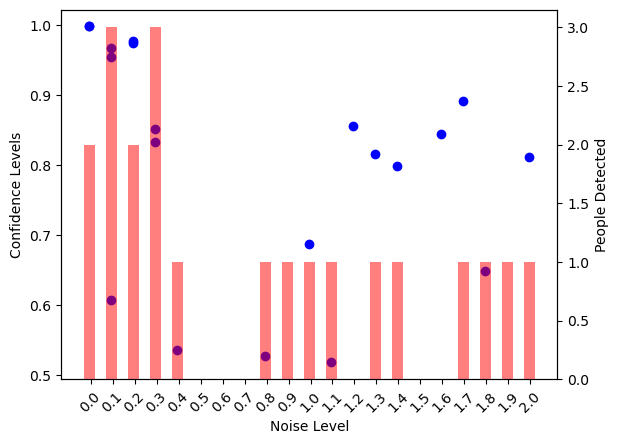

In [85]:
noises = [i/10 for i in range(21)]  
detections = []
people_detected =[]

for noise in noises:
    
    detection = sp_noise_confidence(noise)[1]
    detections.append(detection)
    
    person = sp_noise_confidence(noise)[0]
    people_detected.append(person)
    
    
# Plotting
fig, ax1 = plt.subplots()

# Plot detections
ax1.set_xlabel('Noise Level')
ax1.set_ylabel('Confidence Levels')
for i, detection in enumerate(detections):
    for confidence in detection:
        ax1.scatter(noises[i], confidence, color='b', label='Detections')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Plot number of people detected
ax2 = ax1.twinx()
ax2.set_ylabel('People Detected')
ax2.bar(noises, people_detected, width=0.05, color='r', alpha=0.5, label='People Detected')  

ax1.set_xticks([noise + 0.005 for noise in noises]) 
ax1.set_xticklabels([f"{noise:.1f}" for noise in noises], rotation=45)

plt.show()

At 0.1 itself, confidence levels start to drop. At 0.4, only 1 person is detected so this can be termed as degradation point.

# PART:2 OBJECT DETECTION

In [ ]:
!python objectDetectionService.py